In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
us = pd.read_csv('https://raw.githubusercontent.com/ConorPAnderson/city_temperatures/main/us_city_temperatures')
us.head()
us = us.drop('Unnamed: 0', axis = 1)
us.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,North America,US,Alabama,Birmingham,1,1,1995,50.7
1,North America,US,Alabama,Birmingham,1,2,1995,37.2
2,North America,US,Alabama,Birmingham,1,3,1995,33.2
3,North America,US,Alabama,Birmingham,1,4,1995,33.3
4,North America,US,Alabama,Birmingham,1,5,1995,26.4


In [3]:
#Average temperature on any day in between 1995 and 2019 for each state
us.groupby(by = 'State').mean().sort_values('AvgTemperature')['AvgTemperature']

State
Alaska                  36.428500
North Dakota            43.211873
Minnesota               43.899440
Maine                   44.175410
Montana                 46.288385
Wyoming                 46.492973
South Dakota            46.969134
Vermont                 47.225447
New Hampshire           47.264182
Wisconsin               47.488118
Michigan                47.916208
Iowa                    50.312338
Idaho                   50.443748
New York                50.568758
Washington              50.832128
Nebraska                51.052051
Illinois                51.617948
Colorado                51.746451
Massachusetts           51.943704
Rhode Island            52.019313
Ohio                    52.079183
Connecticut             52.201946
Pennsylvania            52.677091
Indiana                 53.000066
West Virginia           53.171823
Utah                    53.921585
Oregon                  53.980793
Kansas                  54.952164
Delaware                55.228686
New Jers

In [4]:
#Lowest average temperature on any day in between 1995 and 2019 for each state
us.groupby(by = 'State').min().sort_values('AvgTemperature')['AvgTemperature']

State
Alaska                 -50.0
Minnesota              -29.8
North Dakota           -29.5
Montana                -26.4
South Dakota           -22.2
Wisconsin              -21.2
Maine                  -20.9
Illinois               -20.0
Wyoming                -18.1
Iowa                   -17.8
Indiana                -15.6
Michigan               -15.1
Vermont                -14.1
Nebraska               -13.4
Colorado               -11.0
Ohio                   -10.1
New York                -9.8
Washington              -9.4
Idaho                   -9.2
Missouri                -6.1
Pennsylvania            -5.9
Kansas                  -5.6
New Hampshire           -5.0
West Virginia           -4.2
Connecticut             -2.1
Kentucky                -0.9
Massachusetts            0.2
Rhode Island             0.3
Texas                    2.1
Utah                     2.8
New Mexico               3.0
Oregon                   4.2
Oklahoma                 4.2
Tennessee                4.4
New Jers

In [5]:
#Highest average temperature on any day in between 1995 and 2019 for each state
us.groupby(by = 'State').max().sort_values('AvgTemperature')['AvgTemperature']

State
Alaska                   79.5
Wyoming                  87.1
Hawaii                   87.2
Vermont                  88.8
Maine                    89.1
Rhode Island             89.2
New Mexico               89.4
Michigan                 89.4
Delaware                 89.7
Connecticut              89.8
New Hampshire            90.1
Massachusetts            90.7
North Carolina           91.0
Ohio                     91.2
Alabama                  91.5
North Dakota             91.7
Minnesota                92.0
Utah                     92.2
Wisconsin                92.2
Illinois                 92.3
West Virginia            92.5
Maryland                 92.8
South Carolina           92.8
Mississippi              92.8
Florida                  92.8
District of Columbia     92.8
Pennsylvania             92.9
Iowa                     93.0
Kentucky                 93.2
Nebraska                 93.2
Virginia                 93.5
New York                 93.7
Indiana                  94.0
Tenn

In [6]:
st_yr = us.groupby(['State','Year']).mean().sort_values(['State','Year'])
st_yr = st_yr.reset_index().drop(labels = ['Month','Day'], axis = 1)
st_yr

,State,Year,AvgTemperature
0,Alabama,1995,63.658985
1,Alabama,1996,62.389703
2,Alabama,1997,62.843356
3,Alabama,1998,65.830657
4,Alabama,1999,64.870604
...,...,...,...
1261,Wyoming,2015,47.870822
1262,Wyoming,2016,47.773770
1263,Wyoming,2017,47.486575
1264,Wyoming,2018,46.503699


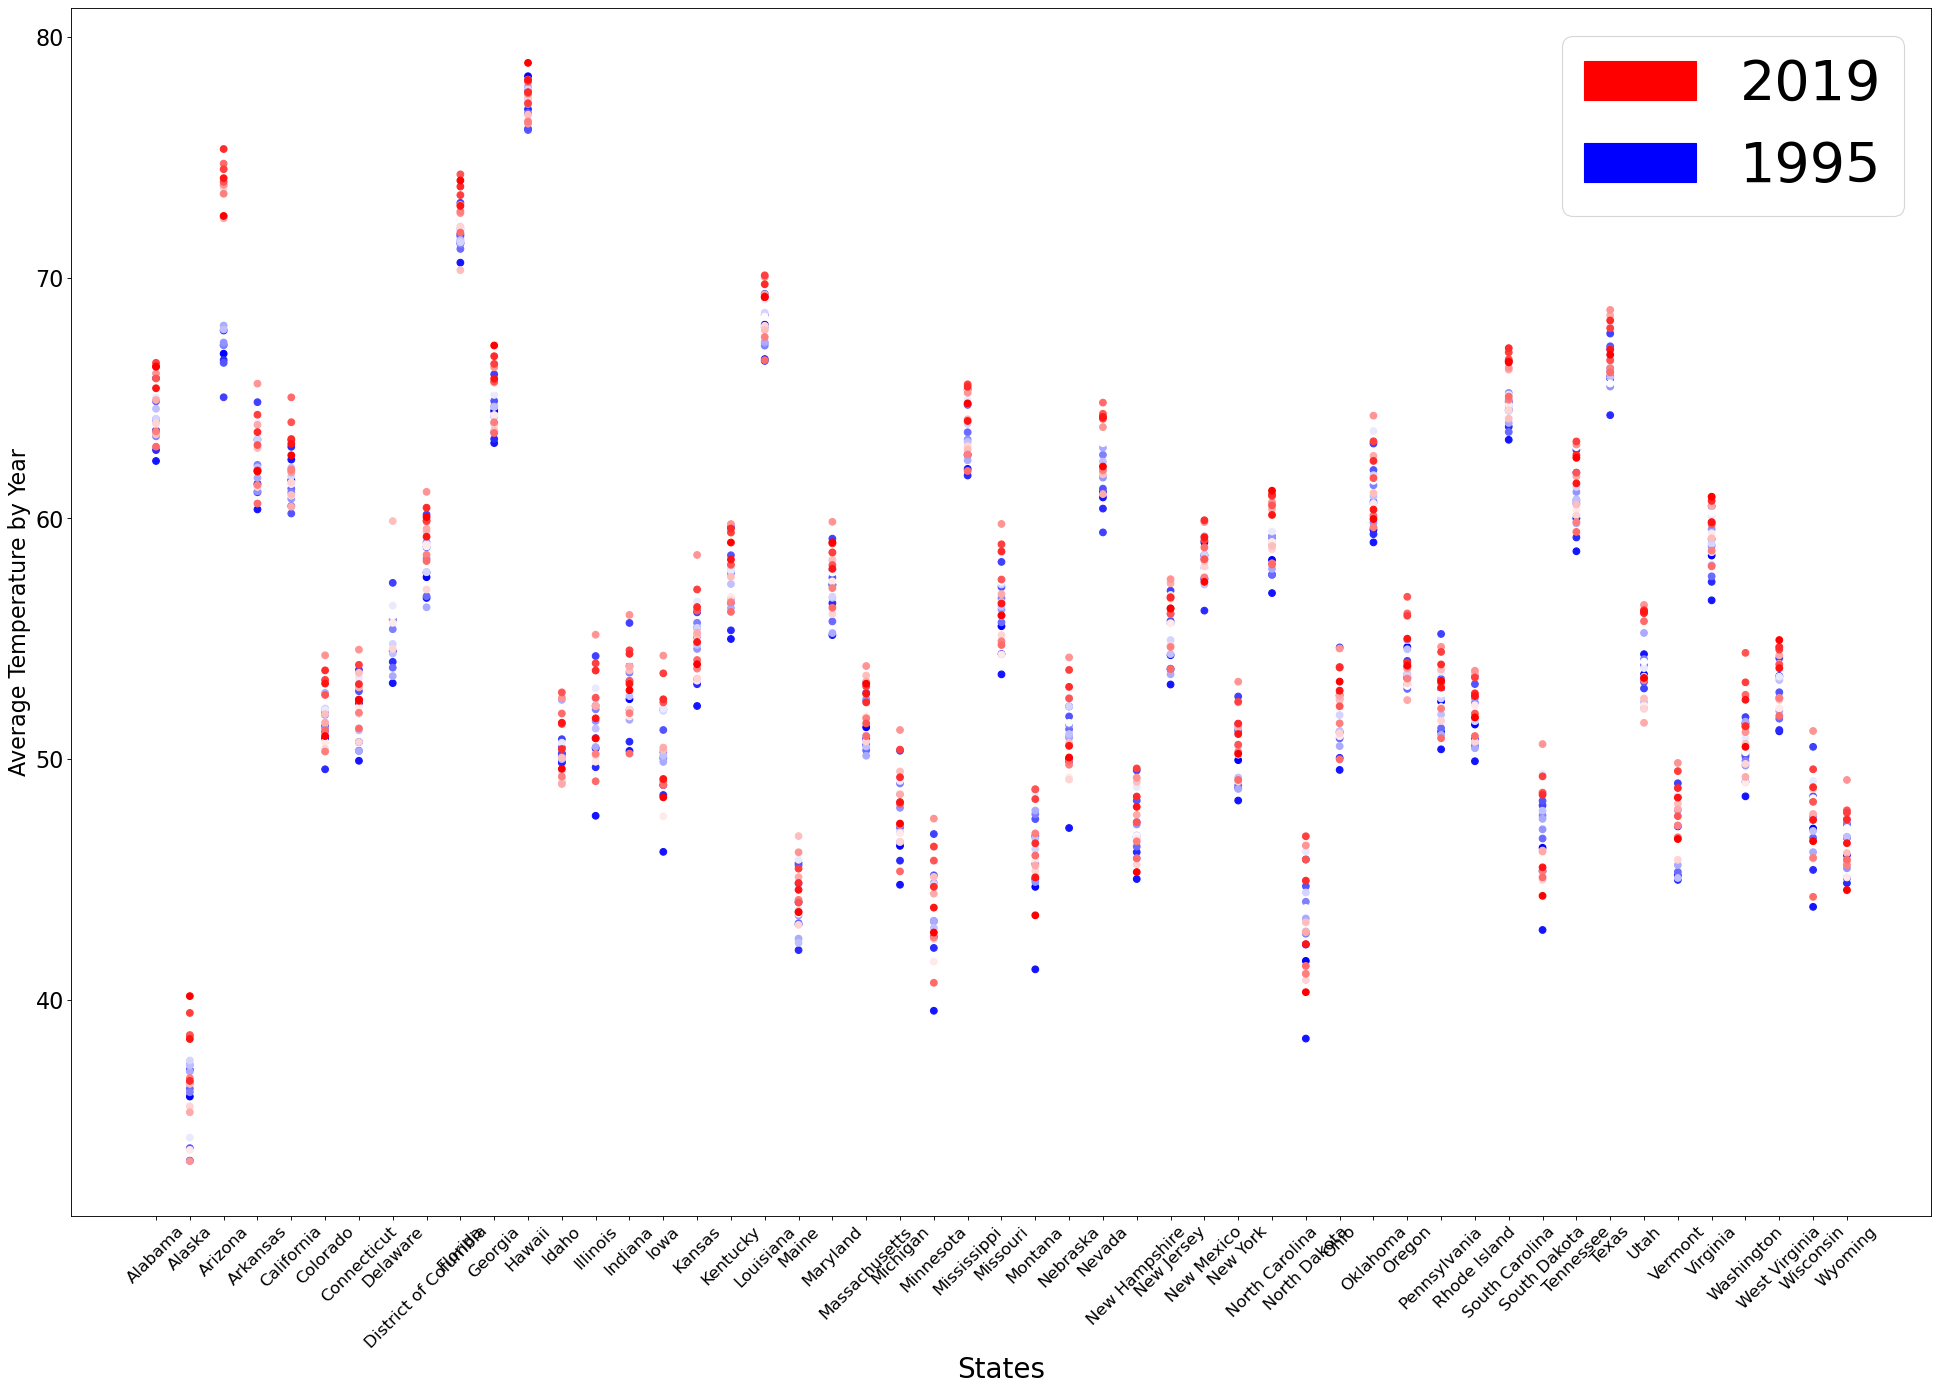

In [25]:
figure(figsize = (30,20), dpi = 80)
plt.scatter(x = st_yr['State'], y = st_yr['AvgTemperature'], c = st_yr['Year'], cmap = 'bwr')
#plt.plot(st_yr['State'][st_yr['State'] == 1995], st_yr['AvgTemperature'])
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 20)
plt.xlabel('States', fontsize = 25)
plt.ylabel('Average Temperature by Year', fontsize = 20)
red_patch = mpatches.Patch(color='red', label='2019')
blue_patch = mpatches.Patch(color='blue', label='1995')
plt.legend(handles=[red_patch, blue_patch], prop={'size': 50})
plt.show()

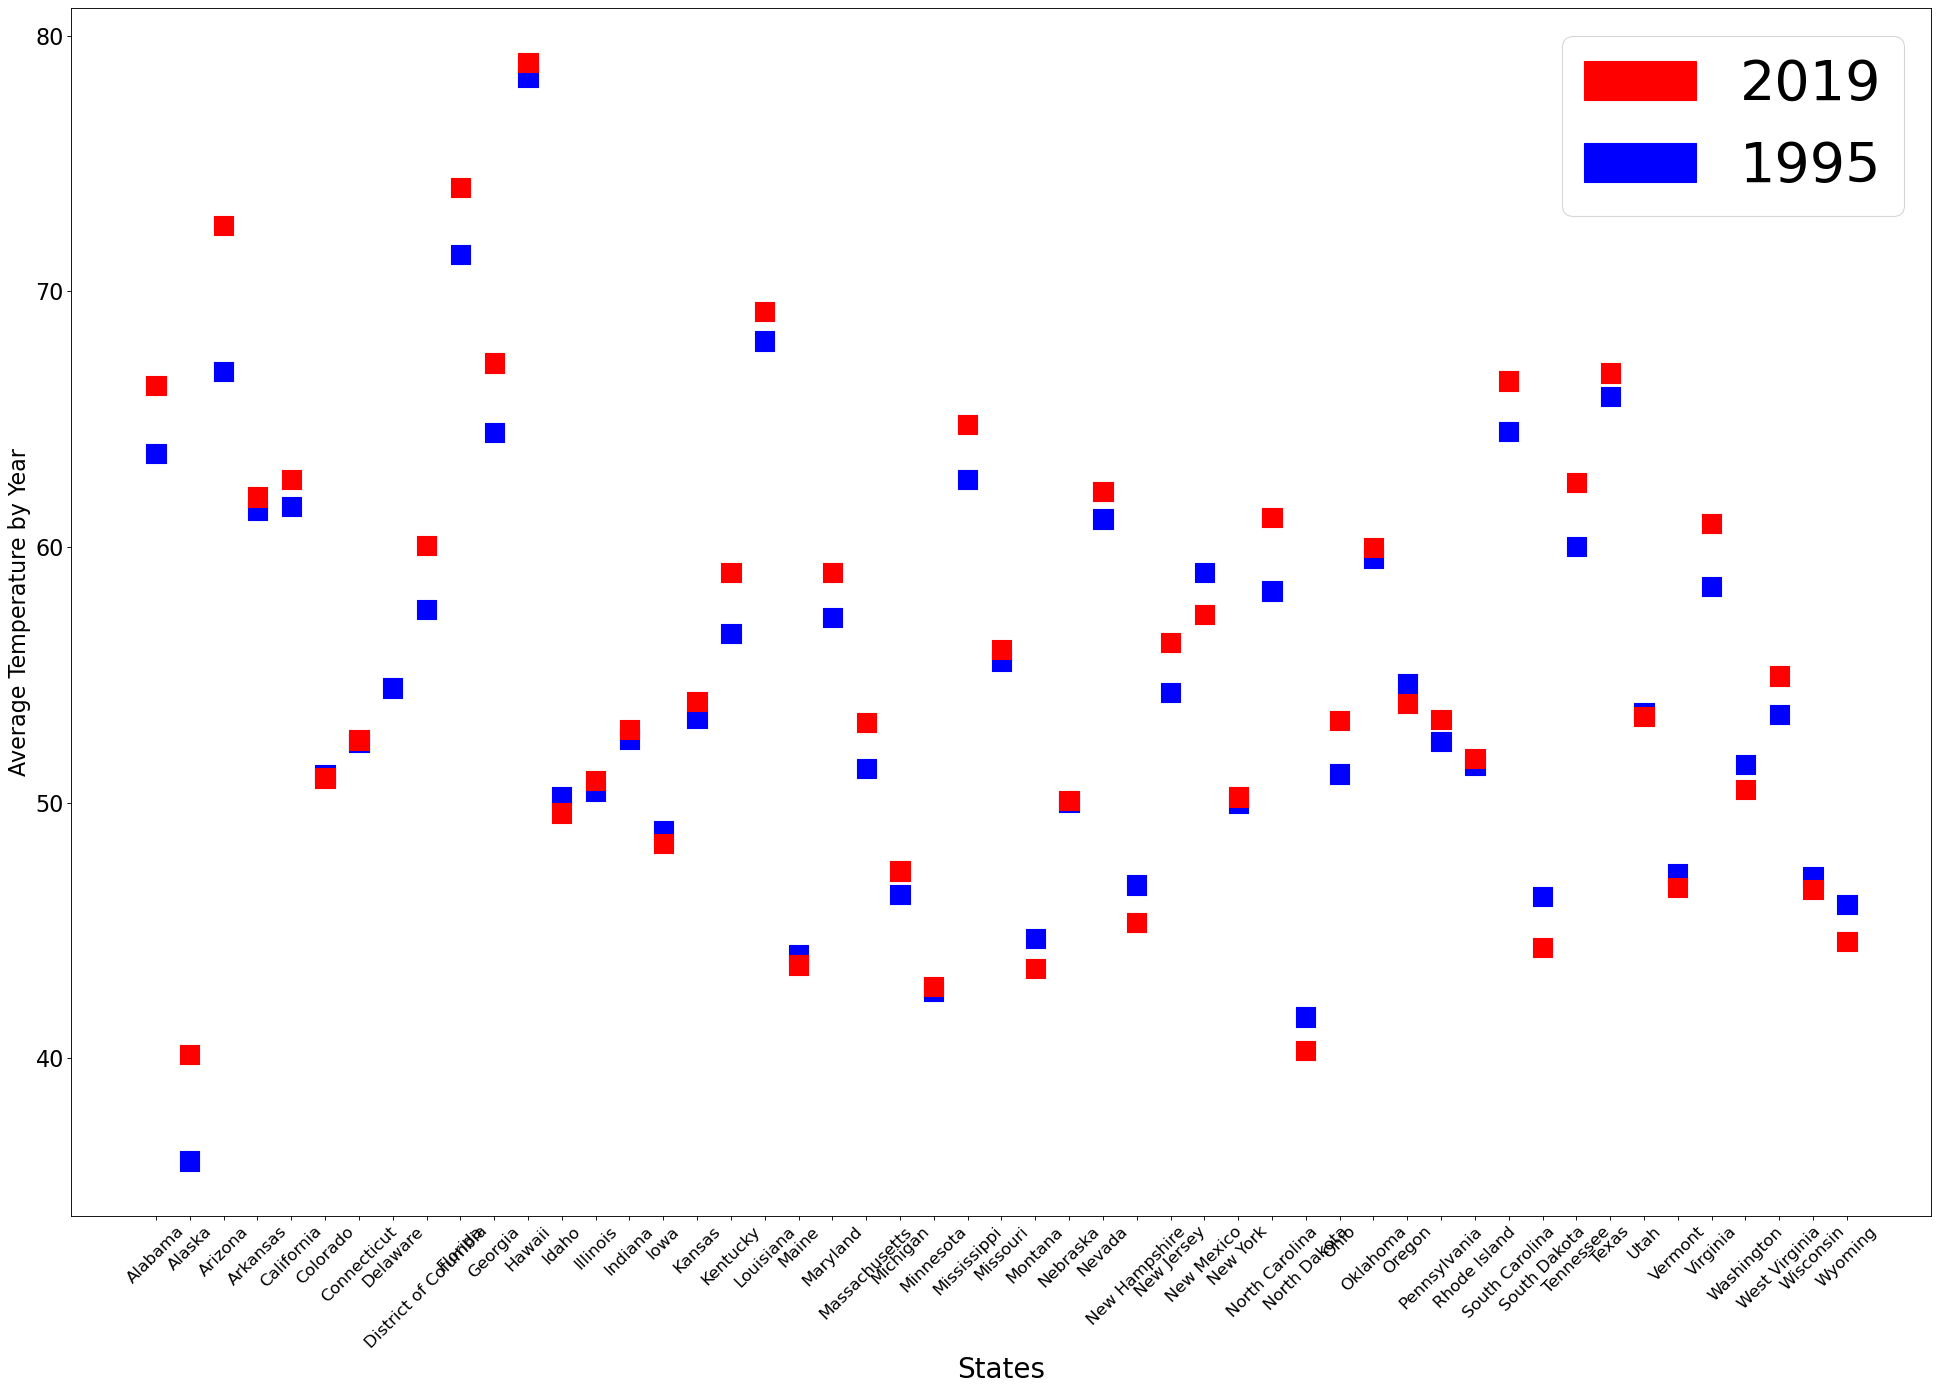

In [35]:
st_yr_old_new = st_yr[~st_yr['Year'].isin(range(1996,2019))]

figure(figsize = (30,20), dpi = 80)
plt.scatter(x = st_yr_old_new['State'], y = st_yr_old_new['AvgTemperature'], marker = 's', s = 300, c = st_yr_old_new['Year'], cmap = 'bwr')
#plt.plot(st_yr['State'][st_yr['State'] == 1995], st_yr['AvgTemperature'])
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 20)
plt.xlabel('States', fontsize = 25)
plt.ylabel('Average Temperature by Year', fontsize = 20)
red_patch = mpatches.Patch(color='red', label='2019')
blue_patch = mpatches.Patch(color='blue', label='1995')
plt.legend(handles=[red_patch, blue_patch], prop={'size': 50})
plt.show()

# So now how do I make subplots where each plot is a different state and the plots are line charts showing the AvgTemp over each year from 1995-2019

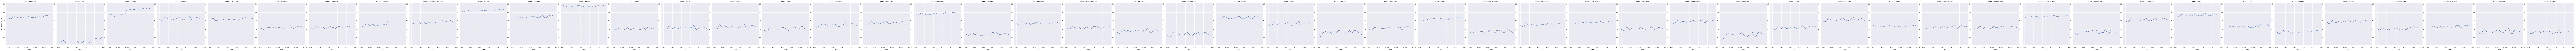

In [47]:
sns.set(style='ticks')
sns.set_style('darkgrid')
x = sns.relplot(data = st_yr, x = 'Year', y = 'AvgTemperature', col = 'State', kind = 'line')
for axis in x.axes.flat:
    axis.tick_params(labelleft=True)

In [52]:
st_yr_old_new

,State,Year,AvgTemperature
0,Alabama,1995,63.658985
24,Alabama,2019,66.316849
25,Alaska,1995,35.973035
49,Alaska,2019,40.147215
50,Arizona,1995,66.849452
...,...,...,...
1215,West Virginia,2019,54.947397
1216,Wisconsin,1995,47.111689
1240,Wisconsin,2019,46.587032
1241,Wyoming,1995,46.011233
